# Applying labs to our dataset
## Lab 1

In [40]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [41]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [42]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

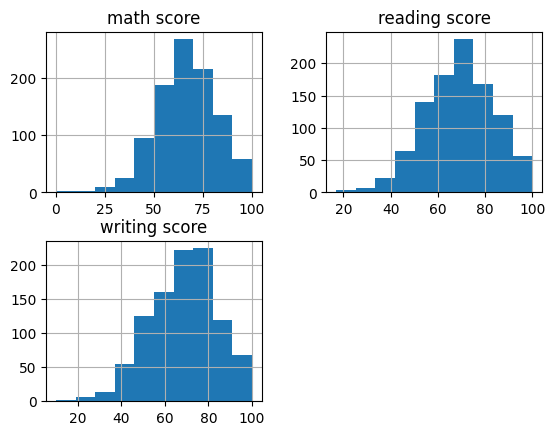

In [43]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

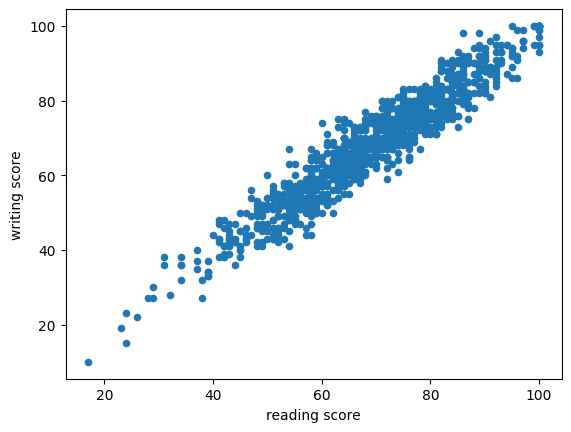

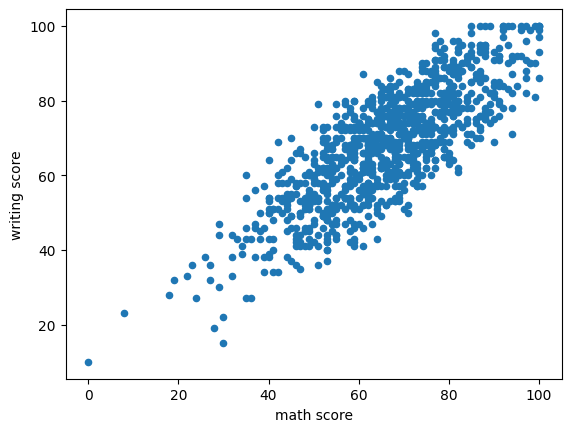

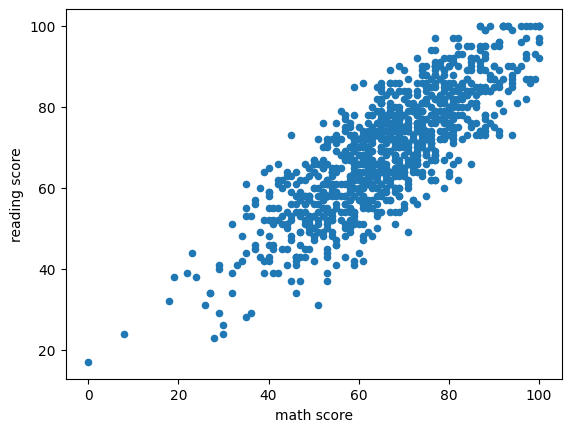

In [44]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Data Normalization & Factorization

In [45]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We need to factorize our categorical columns, so that all our data is numerical. 

In [46]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [47]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [48]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


### Splitting into train and test set and scaling

In [49]:
# Data where we keep the maths score numerical: 
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [50]:
# Data where we turn the maths score into categories of A, B, C, D, FAIL
# Discretize the data back into string format
def binFunction(row):
    if row["math score"] >= 70:
        return "A"
    elif row["math score"] >= 60:
        return "B"
    elif row["math score"] >= 50:
        return "C"
    elif row["math score"] >= 40:
        return "D"
    else:
        return "FAIL"
    
score_labels = ["F", "D", "C", "B", "A"]
exam_data_copy = df.copy()

# exam_data_copy["math score"] = pd.cut(exam_data_copy["math score"], bins = 5, labels=score_labels)

# data_categorical_target = exam_data_copy.apply(binFunction, axis=1)

# exam_data_copy

In [51]:
# Uncomment this if you want categorical data 

# X = exam_data_copy[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
# y = exam_data_copy[['math score']]

In [52]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [53]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

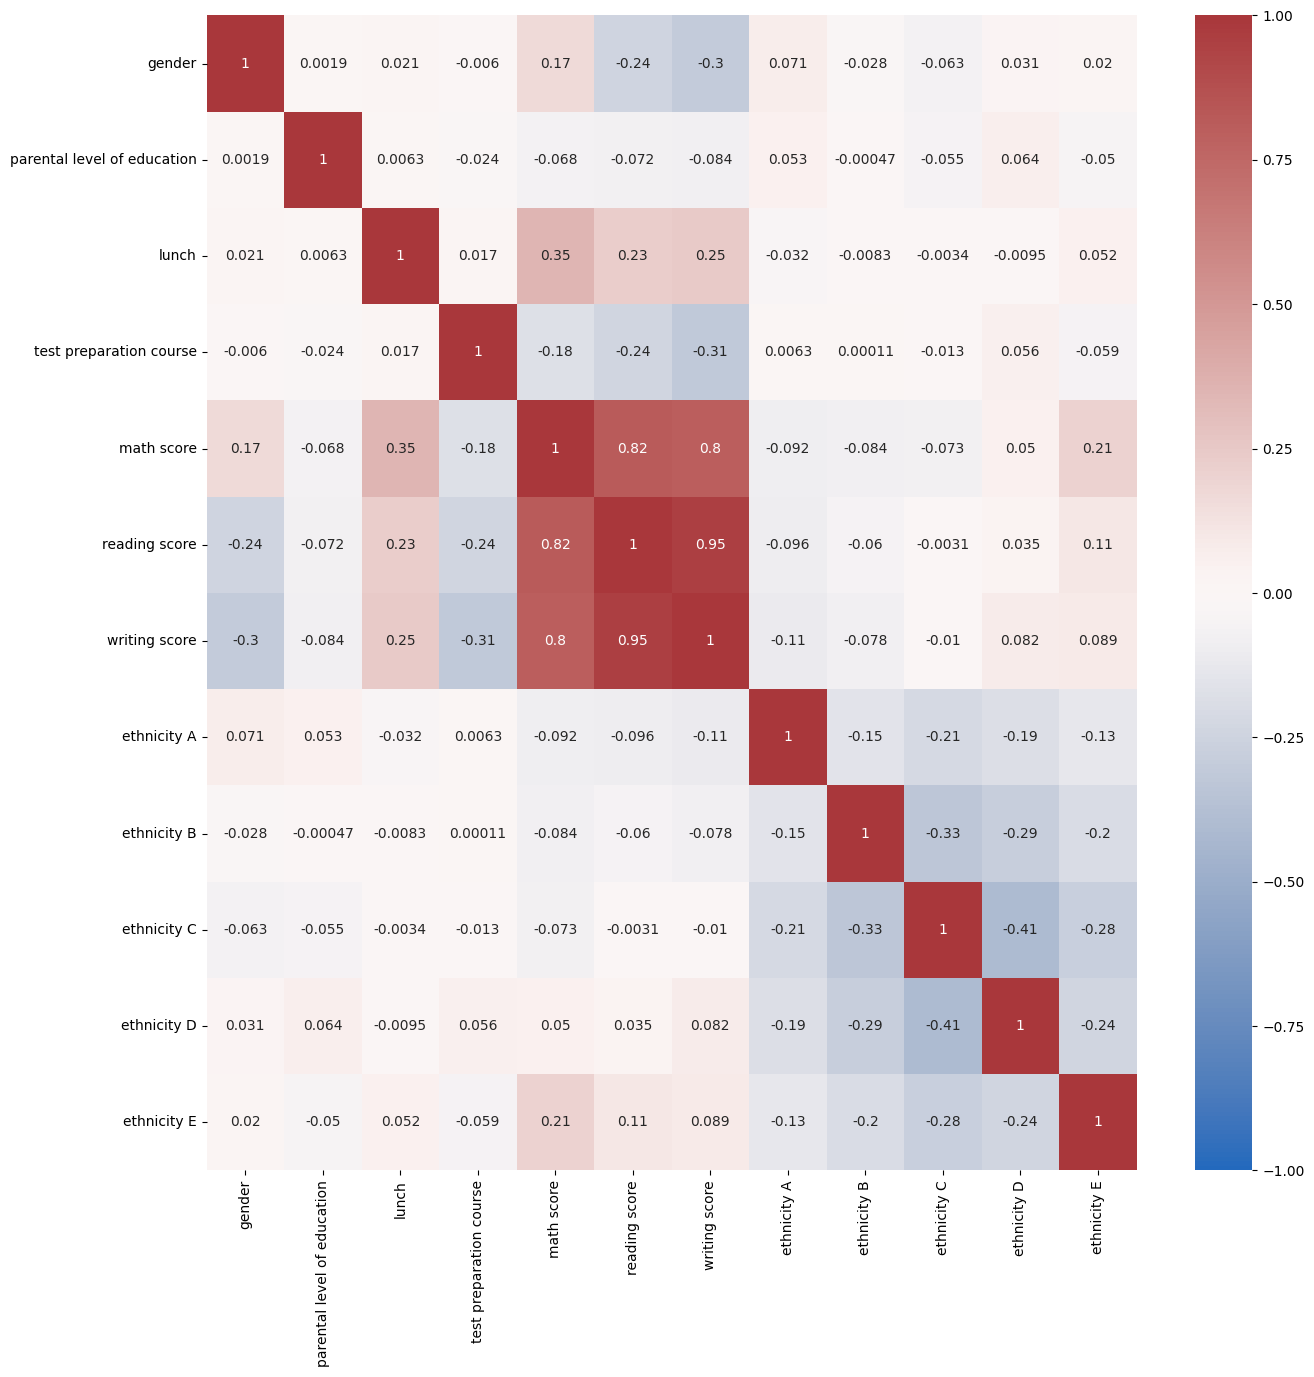

In [54]:
import seaborn as sns 

# Correlation Matrix: 
corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [55]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [56]:
data_top_correlation_features = df[['writing score', 'math score', 'gender']]

Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8669485000478924

Now let's see if there's a difference in accuracy when we only train with the top correlated features. Keep in mind that accuracy is not necessarily the best measure to evaluate a model. 

In [58]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_top_correlation_features, df[['math score']]
)

In [59]:
# 3 features. 
lr_three = LinearRegression() 
lr_three.fit(X_two_train, y_two_train)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_three.predict(X_two_test).squeeze()}
)
lr_three.score(X_two_test, y_two_test)

1.0

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [60]:
exam_data_copy['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [61]:
# Change to dataset where 'math score' is categorical. 

def binFunction(row):
    if row["math score"] >= 70:
        return 1
    else:
        return 0
    
data_categorical_target = df.copy().apply(binFunction, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_categorical_target)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [63]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = sgd_clf.predict(X_test)

In [64]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics = {}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    metrics['TP'] = con_matrix[0][0]
    metrics['FP'] = con_matrix[0][1]
    metrics['TN'] = con_matrix[1][1]
    metrics['FN'] = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])
    metrics['specificity'] = metrics['TN'] / (metrics['TN'] + metrics['FP'])

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))
    
    return metrics

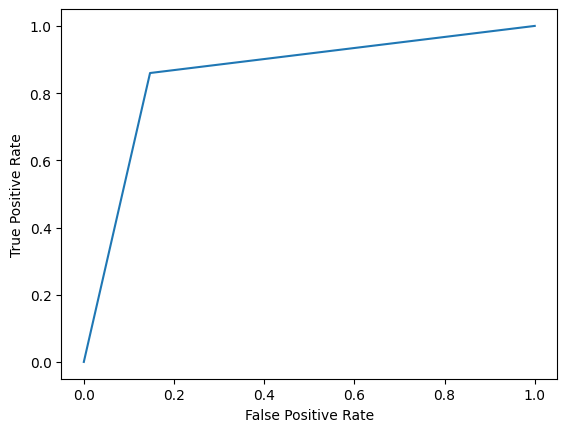

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.856  122  21  92  15     0.890511     0.814159   0.814159  0.859813   

   f1-score  roc-area  
0  0.836364   0.85648  


{'accuracy': 0.856,
 'TP': 122,
 'FP': 21,
 'TN': 92,
 'FN': 15,
 'sensitivity': 0.8905109489051095,
 'specificity': 0.8141592920353983,
 'precision': 0.8141592920353983,
 'recall': 0.8598130841121495,
 'f1-score': 0.8363636363636363,
 'roc-area': 0.8564799686295013}

In [65]:
# Get metrics for SDG Classifier 
getMetrics(y_true, y_pred)

<AxesSubplot:>

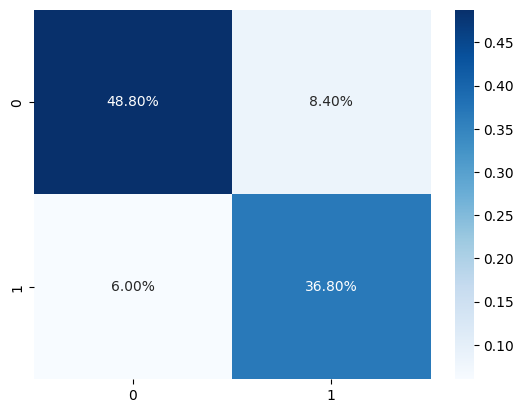

In [66]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5

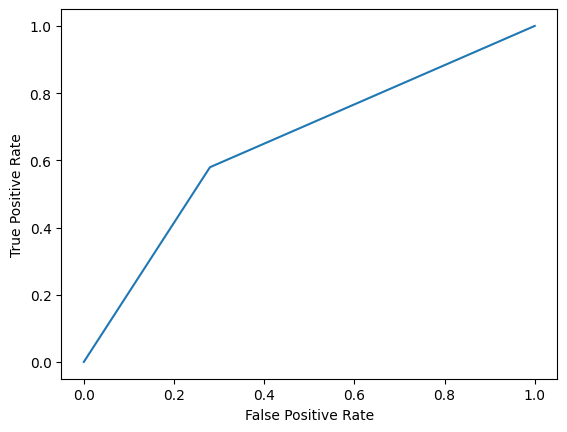

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0      0.66  103  40  62  45     0.695946     0.607843   0.607843  0.579439   

   f1-score  roc-area  
0  0.593301  0.649859  


{'accuracy': 0.66,
 'TP': 103,
 'FP': 40,
 'TN': 62,
 'FN': 45,
 'sensitivity': 0.6959459459459459,
 'specificity': 0.6078431372549019,
 'precision': 0.6078431372549019,
 'recall': 0.5794392523364486,
 'f1-score': 0.5933014354066984,
 'roc-area': 0.6498594863080843}

In [67]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
getMetrics(y_test, multi_nom_y_pred)

# Lab 6
Unsupervised Learning: Clustering.

In [68]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

random_state = 42

In [69]:
X_k_means = X[['reading score', 'writing score']].to_numpy()
X_train_reading_writing, X_test_reading_writing = train_test_split(X_k_means)

Let's train a K-Means clusterer on our dataset. It will try to find each cluster's centeroid and assign each instance to the closest centeroid's class.  
`fit_predict` Computes cluster centeroids and predicts cluster index for each sample  
`kmeans.fit_predict`: Check this out. 

In [73]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans_output = kmeans.fit_predict(X_train_reading_writing)

In [71]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

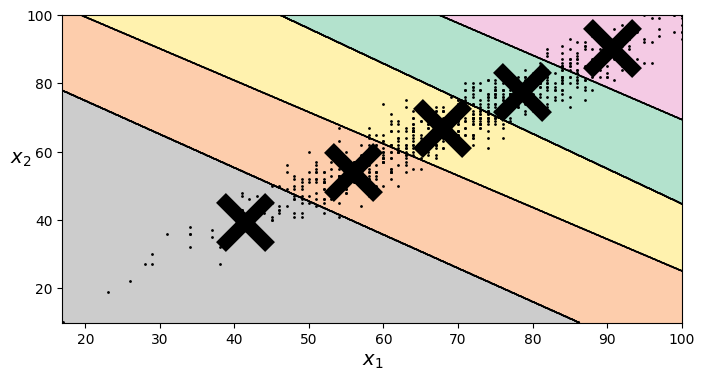

In [74]:
# Plot KMeans algorithm
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train_reading_writing)
plt.show()

In [75]:
# KMeans for a different number of iterations
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=random_state)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=random_state)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=random_state)
kmeans_iter1.fit(X_train_reading_writing)
kmeans_iter2.fit(X_train_reading_writing)
kmeans_iter3.fit(X_train_reading_writing)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=42)

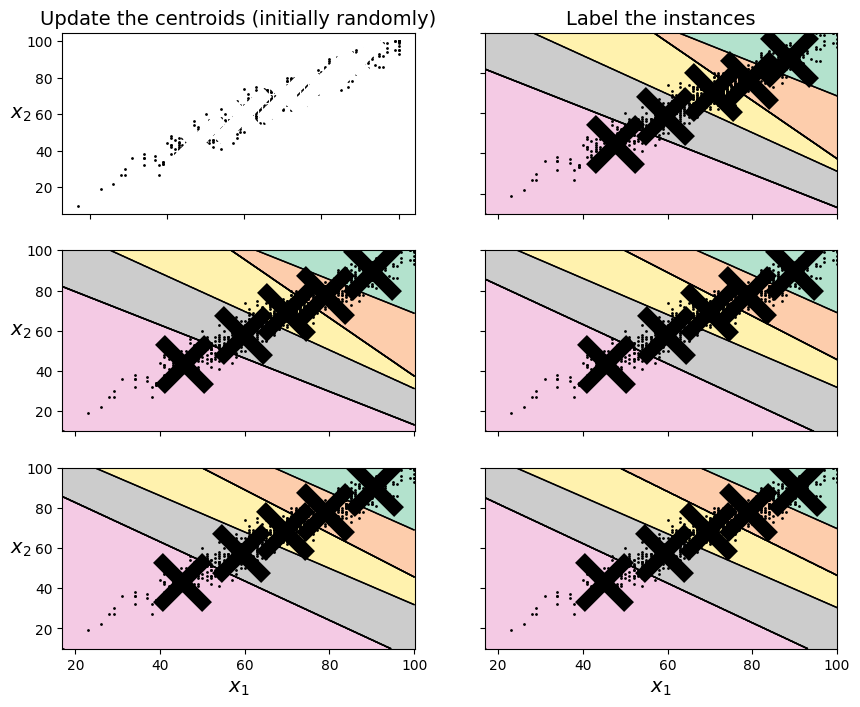

In [76]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train_reading_writing)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train_reading_writing, show_ylabels=False)

plt.show()

## Finding the optimal number of clusters

In [135]:
def plot_clusterer_comparison(clusterers, X):
    for clusterer in clusterers:
        clusterer = clusterer.fit(X)
    
    n_rows = int(len(clusterers) / 2) + 1

    plt.figure(figsize=(10, 3.2 * n_rows))

    for i, clusterer in enumerate(clusterers):
        index = n_rows * 100 + 20 + i + 1
        plt.subplot(index)
        plot_decision_boundaries(clusterer, X)
        plt.title("k = " + str(len(clusterer.cluster_centers_)), fontsize=14)
        index = 0

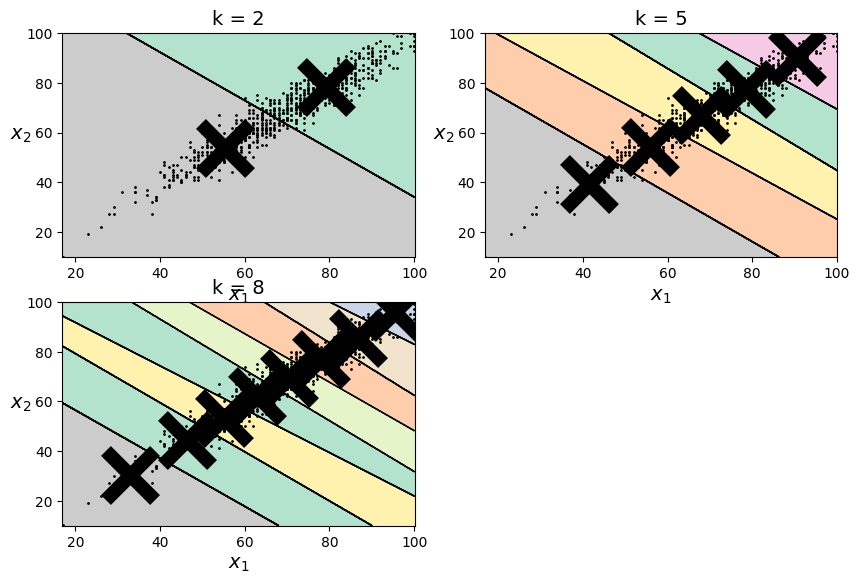

In [136]:
kmeans_k2 = KMeans(n_clusters=2, random_state=random_state)
kmeans_k5 = KMeans(n_clusters=5, random_state=random_state)
kmeans_k8 = KMeans(n_clusters=8, random_state=random_state)

plot_clusterer_comparison([kmeans_k2, kmeans_k5, kmeans_k8], X_train_reading_writing)
plt.show()

### Elbow method
Applies K-Means with a different number of clusters while recording the sum of squared errors. 

In [146]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_reading_writing)
    sse.append(kmeans.inertia_)
    
# Create a dataframe containing the number of clusters and the associated sums of squared error
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,332004.540000
1,2,119280.846787
2,3,65853.269951
3,4,43589.451423
4,5,30978.809676


Text(0, 0.5, 'Inertia')

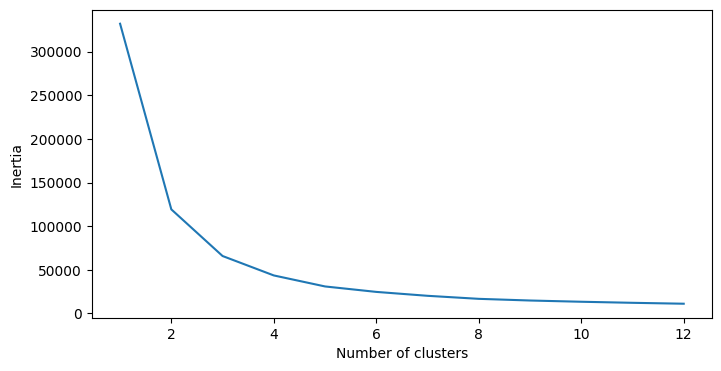

In [147]:
# Plot the elbow method. 
plt.figure(figsize=(8, 4))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [149]:
# Now let's find the correct elbow point 
from kneed import KneeLocator

kl = KneeLocator(range(1, 13), sse, curve='convex', direction='decreasing')
"The optimal number of classes according to the elbow method", kl.elbow

('The optimal number of classes according to the elbow method', 3)

### Gaussian Mixture Model
To learn Gaussian Mixture Models (diagonal, sperical, tied and full covariance matrices supported). 

In [141]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=k, random_state=random_state).fit(X_train_reading_writing)
gm.means_

array([[88.43888246, 87.73691187],
       [66.34954477, 65.67946797],
       [55.416727  , 52.99157084],
       [76.57605834, 75.58717731],
       [42.7161553 , 41.8371276 ]])

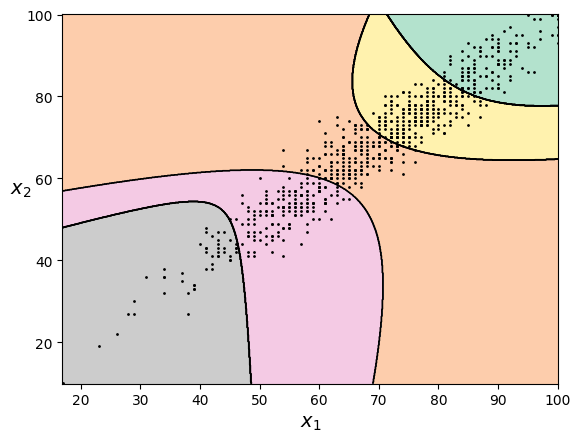

In [142]:
plot_decision_boundaries(gm, X_train_reading_writing, show_centroids=False)

### Agglomerative Clustering
Recursively merges pairs of clusters of sample data. The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.

In [143]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
ac = ac.fit(X_train_reading_writing)

In [144]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

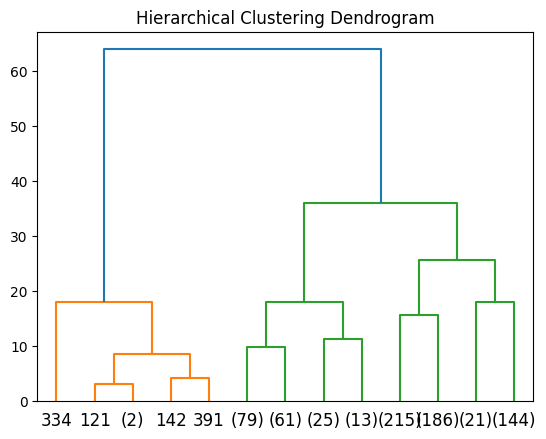

In [145]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, truncate_mode='level', p=3)